## Dataset 
World Bank Data 
https://data.worldbank.org/

### EDA Topic  
- Aid-effectness : 2   
- Infrastructure : 9    

## Countries
Latin America (LCN) + South Korea 

In [1]:
import pandas as pd 
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import AidUtilities as utils

In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

### Cleaning Dataset 

In [3]:
df = pd.read_csv('./dataset/merged.csv', index_col = 0)
df

,Country_Name,Country_Code,Series_Name,Series_Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,ARG,"Net official flows from UN agencies, UNICEF (c...",DT.NFL.UNCF.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.100000e+05,5.656207e+05,7.759976e+05,8.165810e+05,1.385072e+06,8.516109e+05,9.370000e+05,1.007738e+06,1.040100e+07,NaN
1,Belize,BLZ,"Net official flows from UN agencies, UNICEF (c...",DT.NFL.UNCF.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+06,6.678432e+05,7.004835e+05,8.189630e+05,1.348446e+06,1.176425e+06,6.660000e+05,7.948008e+05,2.758000e+06,NaN
2,Bolivia,BOL,"Net official flows from UN agencies, UNICEF (c...",DT.NFL.UNCF.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.520000e+06,1.194459e+06,1.527838e+06,1.526324e+06,1.993361e+06,2.147641e+06,1.623350e+06,1.504762e+06,9.765000e+06,NaN
3,Brazil,BRA,"Net official flows from UN agencies, UNICEF (c...",DT.NFL.UNCF.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.500000e+05,8.185881e+05,8.409079e+05,2.732379e+06,2.499432e+06,2.637594e+06,2.502400e+06,9.855525e+05,1.539600e+07,NaN
4,Chile,CHL,"Net official flows from UN agencies, UNICEF (c...",DT.NFL.UNCF.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000e+05,7.005723e+05,9.115208e+05,1.022587e+06,6.576775e+05,9.533402e+05,9.830000e+05,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,Peru,PER,"ICT service exports (% of service exports, BoP)",BX.GSR.CCIS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.436661e+00,4.416272e+00,3.152589e+00,3.217291e+00,2.721159e+00,2.514201e+00,2.110641e+00,1.700018e+00,1.681117e+00,3.872378
2537,Paraguay,PRY,"ICT service exports (% of service exports, BoP)",BX.GSR.CCIS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.923928e+00,1.499219e+00,1.335862e+00,1.454076e+00,1.622201e+00,1.527725e+00,1.378266e+00,1.307835e+00,1.325765e+00,1.824622
2538,El Salvador,SLV,"ICT service exports (% of service exports, BoP)",BX.GSR.CCIS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.954048e+00,8.515200e+00,6.840498e+00,7.336054e+00,7.428217e+00,7.231015e+00,7.996309e+00,7.711927e+00,7.534510e+00,11.070681
2539,Suriname,SUR,"ICT service exports (% of service exports, BoP)",BX.GSR.CCIS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.370480e+00,8.183359e+00,5.625358e+00,5.010213e+00,5.675815e+00,4.363884e+00,6.965803e+00,5.921915e+00,5.374408e+00,8.835451


In [4]:
Series_Name = df.Series_Name.unique() 
Series_Code = df.Series_Code.unique()

print(Series_Name[:5])
print(Series_Code[:5])
print(len(Series_Code))

['Net official flows from UN agencies, UNICEF (current US$)'
 'Technical cooperation grants (BoP, current US$)'
 'Net official flows from UN agencies, UNHCR (current US$)'
 'Prevalence of HIV, total (% of population ages 15-49)'
 'Net official flows from UN agencies, IAEA (current US$)']
['DT.NFL.UNCF.CD' 'BX.GRT.TECH.CD.WD' 'DT.NFL.UNCR.CD' 'SH.DYN.AIDS.ZS'
 'DT.NFL.IAEA.CD']
121


In [5]:
Country_Name = df.Country_Name.unique() # 21
Country_Code = df.Country_Code.unique() # 21
Years = [str(i) for i in range(1960,2021,1)]

print(Country_Name)
print(Country_Code)
print(Years)

['Argentina' 'Belize' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica'
 'Dominica' 'Ecuador' 'Guatemala' 'Guyana' 'Honduras' 'Korea, Rep.'
 'Mexico' 'Nicaragua' 'Panama' 'Peru' 'Paraguay' 'El Salvador' 'Suriname'
 'Uruguay']
['ARG' 'BLZ' 'BOL' 'BRA' 'CHL' 'COL' 'CRI' 'DMA' 'ECU' 'GTM' 'GUY' 'HND'
 'KOR' 'MEX' 'NIC' 'PAN' 'PER' 'PRY' 'SLV' 'SUR' 'URY']
['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


In [6]:
series_info = pd.DataFrame(pd.read_excel('./dataset/Series.xlsx'))
series_info

,Series_Code,Series_Name,New_Series_Name,sourceNote
0,BX.GRT.EXTA.CD.WD,"Grants, excluding technical cooperation (BoP, ...",Grants,Grants are defined as legally binding commitme...
1,BX.GRT.TECH.CD.WD,"Technical cooperation grants (BoP, current US$)",TechCoopGrants,Technical cooperation grants include free-stan...
2,DC.DAC.AUSL.CD,"Net bilateral aid flows from DAC donors, Austr...",NaN,Net bilateral aid flows from DAC donors are th...
3,DC.DAC.AUTL.CD,"Net bilateral aid flows from DAC donors, Austr...",NaN,Net bilateral aid flows from DAC donors are th...
4,DC.DAC.BELL.CD,"Net bilateral aid flows from DAC donors, Belgi...",NaN,Net bilateral aid flows from DAC donors are th...
...,...,...,...,...
116,IT.NET.SECR,Secure Internet servers,InternetServers,"The number of distinct, publicly-trusted TLS/S..."
117,IT.NET.SECR.P6,Secure Internet servers (per 1 million people),PerMill_InternetSubscript,"The number of distinct, publicly-trusted TLS/S..."
118,IT.NET.USER.ZS,Individuals using the Internet (% of population),InternetUsers_Pct,Internet users are individuals who have used t...
119,TM.VAL.ICTG.ZS.UN,ICT goods imports (% total goods imports),ICTImports_Pct,Information and communication technology goods...


In [7]:
def get_series_info(excel, series_code):
    row = excel.loc[excel['Series_Code']==series_code]

    s_name = row['Series_Name'].values[0]
    s_new_name = row['New_Series_Name'].values[0]
    s_info = row['sourceNote'].values[0]
    return s_name, s_new_name, s_info

In [8]:
sheet = pd.read_excel('./dataset/Series.xlsx') 
series_name, series_new_name, series_info = get_series_info(sheet, 'IT.NET.USER.ZS')
print(series_name)
print(series_new_name)
print(series_info)

Individuals using the Internet (% of population)
InternetUsers_Pct
Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.


In [9]:
del_series = []
for _, row in sheet.iterrows():
    if type(row['New_Series_Name']) == float: # NaN
        del_series.append(row['Series_Code'])

print(len(del_series))
del_series[:5]

48


['DC.DAC.AUSL.CD',
 'DC.DAC.AUTL.CD',
 'DC.DAC.BELL.CD',
 'DC.DAC.CANL.CD',
 'DC.DAC.CECL.CD']

In [10]:
del_index = []
for index, row in df.iterrows():
    if row['Series_Code'] in del_series:
        del_index.append(index)
    
    else:
        _, series_new_name, _ = get_series_info(sheet, row['Series_Code'])
        df = df.replace(row['Series_Name'], series_new_name)
    
len(del_index)

1008

In [16]:
new_df = df.drop(del_index)
new_df = new_df.reset_index()
new_df = new_df.drop(['index'], axis=1)
new_df.to_csv('new_df.csv', index=0)
pd.read_csv('new_df.csv')

,Country_Name,Country_Code,Series_Name,Series_Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,ARG,TechCoopGrants,BX.GRT.TECH.CD.WD,840000.0,840000.0,1470000.0,1140000.0,1600000.0,2000000.0,...,5.202000e+07,5.680000e+07,5.314000e+07,5.232000e+07,3.572000e+07,3.482000e+07,4.593000e+07,4.569000e+07,4.280000e+07,NaN
1,Belize,BLZ,TechCoopGrants,BX.GRT.TECH.CD.WD,1800000.0,40000.0,130000.0,60000.0,180000.0,190000.0,...,4.120000e+06,5.360000e+06,4.920000e+06,7.220000e+06,5.320000e+06,7.940000e+06,9.510000e+06,4.350000e+06,5.640000e+06,NaN
2,Bolivia,BOL,TechCoopGrants,BX.GRT.TECH.CD.WD,710000.0,790000.0,1200000.0,1460000.0,1300000.0,1110000.0,...,1.105600e+08,1.173600e+08,9.671000e+07,9.333000e+07,7.940000e+07,7.491000e+07,7.191000e+07,7.108000e+07,5.440000e+07,NaN
3,Brazil,BRA,TechCoopGrants,BX.GRT.TECH.CD.WD,-720000.0,-210000.0,1410000.0,2060000.0,2370000.0,2240000.0,...,2.132800e+08,2.418300e+08,2.359300e+08,2.376200e+08,1.895800e+08,2.008400e+08,2.019900e+08,1.806800e+08,1.899300e+08,NaN
4,Chile,CHL,TechCoopGrants,BX.GRT.TECH.CD.WD,800000.0,1430000.0,2510000.0,2010000.0,3230000.0,3390000.0,...,5.556000e+07,6.495000e+07,5.886000e+07,5.642000e+07,4.151000e+07,4.581000e+07,4.701000e+07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,Peru,PER,ICT_Exports_Pct,BX.GSR.CCIS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.436661e+00,4.416272e+00,3.152589e+00,3.217291e+00,2.721159e+00,2.514201e+00,2.110641e+00,1.700018e+00,1.681117e+00,3.872378
1529,Paraguay,PRY,ICT_Exports_Pct,BX.GSR.CCIS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.923928e+00,1.499219e+00,1.335862e+00,1.454076e+00,1.622201e+00,1.527725e+00,1.378266e+00,1.307835e+00,1.325765e+00,1.824622
1530,El Salvador,SLV,ICT_Exports_Pct,BX.GSR.CCIS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.954048e+00,8.515200e+00,6.840498e+00,7.336054e+00,7.428217e+00,7.231015e+00,7.996309e+00,7.711927e+00,7.534510e+00,11.070681
1531,Suriname,SUR,ICT_Exports_Pct,BX.GSR.CCIS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.370480e+00,8.183359e+00,5.625358e+00,5.010213e+00,5.675815e+00,4.363884e+00,6.965803e+00,5.921915e+00,5.374408e+00,8.835451


### Countries' figures for a particular column

In [17]:
def col_countries(series_name):
    df = new_df.loc[new_df['Series_Name']==f'{series_name}']
    df.drop(['Series_Name', 'Country_Code','Series_Code'], axis=1, inplace=True)
    df.set_index('Country_Name', inplace=True)
    df = df.T       
    ax = df.plot(figsize=(20,10) )
    ax.set_title(f'{series_name}',color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

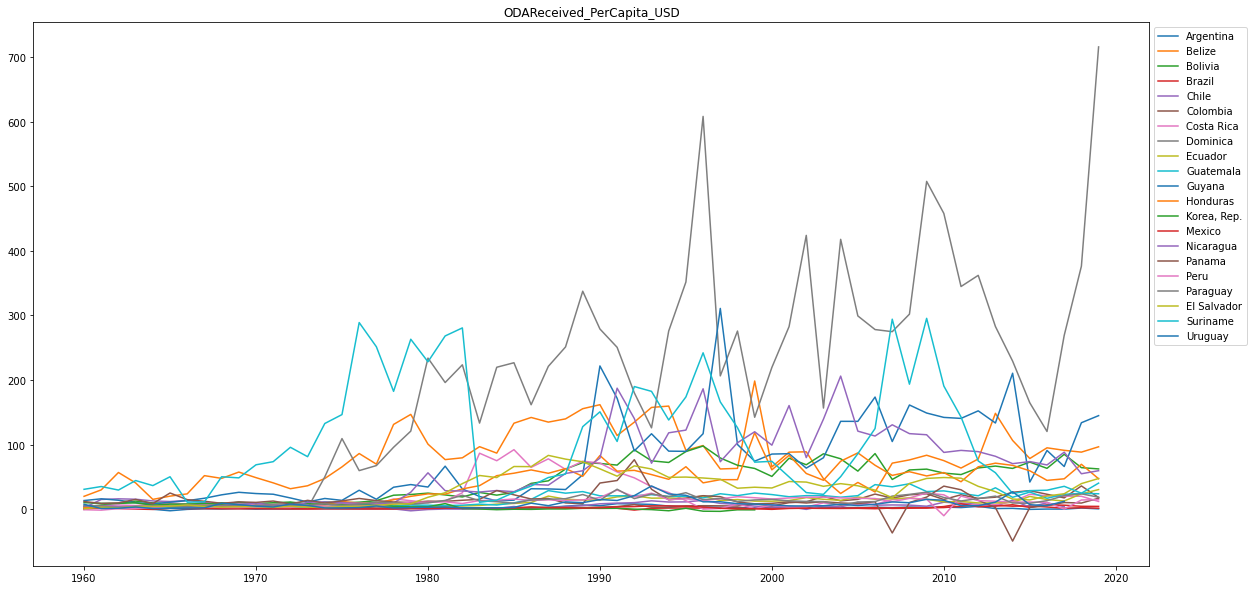

In [18]:
col_countries('ODAReceived_PerCapita_USD')

As a result of examining the dataset separately due to the overlapping color of the plot, Dominica was the country with the largest number of ODA per capita. However, we collected data about infrastructure to see if it was effectiveon its country.Data analysis methodology using Environmental Performance Index(EPI) should also be noted.

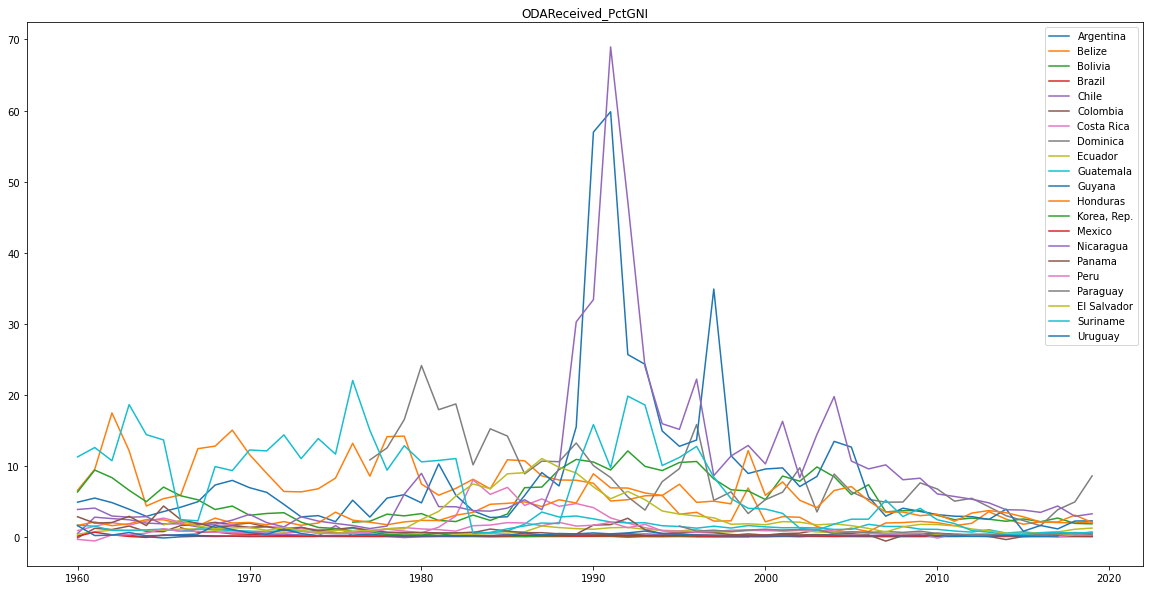

In [199]:
col_countries('ODAReceived_PctGNI')

 Net official development assistance (ODA) consists of disbursements of loans made on concessional terms and grants by DAC.In the early 1990s, the figures for Guyana and Nicaragua rose, which requires close investigation. GNI is a good indicator for examining the economic situation closer to real life than GDP. From a macro perspective, the national economy can be linked to GDP, but GNI is considered to be closer to the actual welfare of the people. However, the fact that the figure was large despite receiving less support per individual than other countries at the same time may have led to an event. South Korea also received a large amount of international aid in fiscal 1980 and 1995.


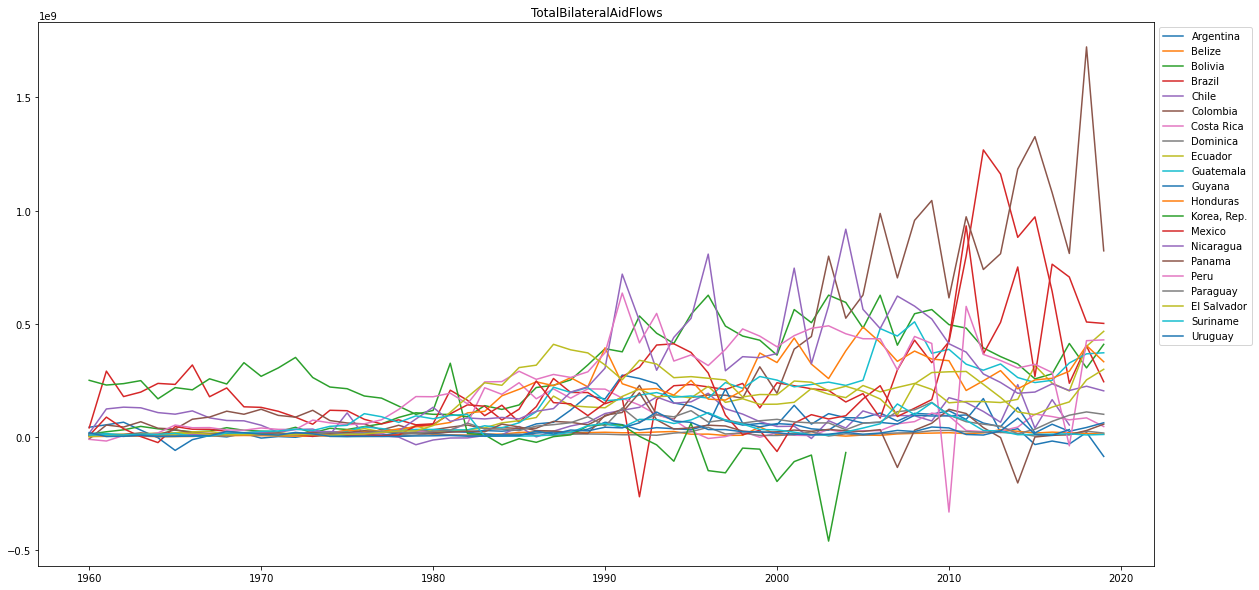

In [200]:
col_countries('TotalBilateralAidFlows')

Bilateral aid flows from DAC donors are the net disbursements of official development assistance (ODA) or official aid from the members of the Development Assistance Committee (DAC) to promote economic development and welfare in countries and territories. Countries that receive large amounts of aid in a short time can continue to receive large amounts of aid or explore the trend they want. Of course, in the interests of the international community, there is a particularly large amount of assistance given to countries in their own interests, but the effect of this is not so great, namely economic growth, so it seems that the results continue to absorb it.  

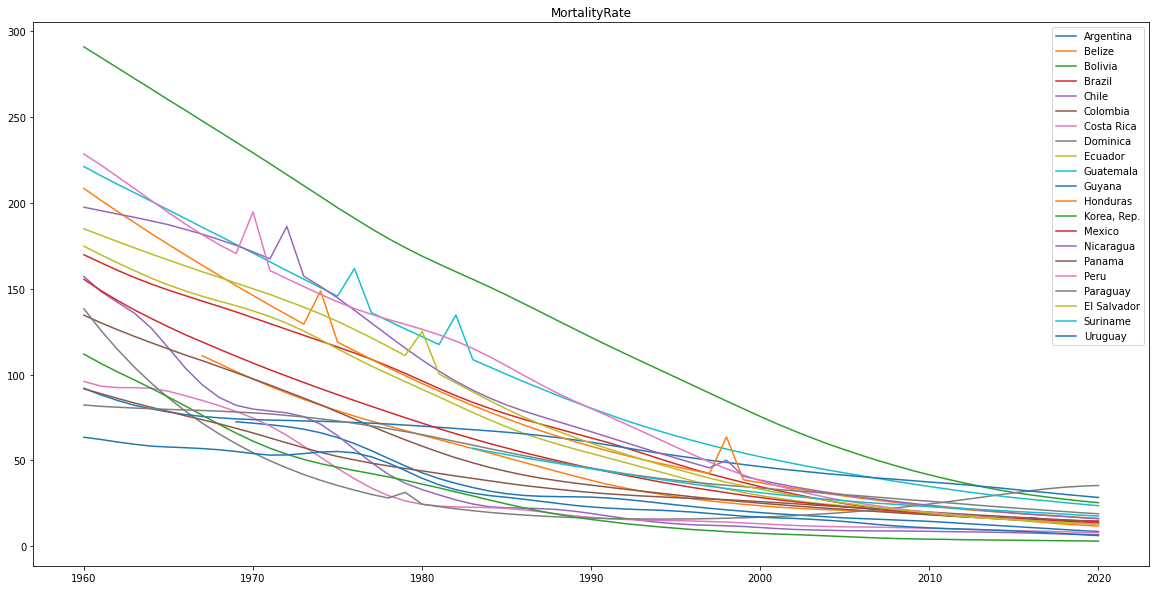

In [201]:
col_countries('MortalityRate')

Under-five mortality rate is the probability per 1,000 that a newborn baby will die before reaching age five. Interesting outliers can be seen in these indicators, and these numbers can be confirmed in various countries. Death from an epidemic? Or is it about a simple data collection error? This may pose a risk to the nation's disease management.

### Explore Mexico's data

In [17]:
mexico_df = new_df.loc[new_df['Country_Name']=='Mexico']
mexico_df.head(10)

,Country_Name,Country_Code,Series_Name,Series_Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
13,Mexico,MEX,TechCoopGrants,BX.GRT.TECH.CD.WD,6.120000e+06,5.400000e+05,2.330000e+06,2.890000e+06,3.650000e+06,3.110000e+06,...,1.088300e+08,1.197400e+08,1.194000e+08,1.269200e+08,1.082500e+08,1.144300e+08,1.222400e+08,1.199900e+08,1.149700e+08,NaN
34,Mexico,MEX,HIV_Pct,SH.DYN.AIDS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000e-01,3.000000e-01,3.000000e-01,3.000000e-01,3.000000e-01,3.000000e-01,3.000000e-01,3.000000e-01,4.000000e-01,0.4
55,Mexico,MEX,ODAReceived_USD,DT.ODA.ODAT.CD,7.760000e+06,8.470000e+07,3.713000e+07,3.060000e+06,-2.273000e+07,4.895000e+07,...,9.670200e+08,4.079300e+08,5.623900e+08,8.148900e+08,3.210700e+08,8.093400e+08,7.546100e+08,5.493000e+08,5.357900e+08,NaN
76,Mexico,MEX,NetMigration,SM.POP.NETM,NaN,NaN,-4.090850e+05,NaN,NaN,NaN,...,NaN,-4.224770e+05,NaN,NaN,NaN,NaN,-3.000000e+05,NaN,NaN,NaN
97,Mexico,MEX,ODAReceived_PctCGE,DT.ODA.ODAT.XP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.769386e-01,1.552692e-01,2.047591e-01,2.844224e-01,1.268042e-01,3.579622e-01,3.190001e-01,2.200512e-01,2.077713e-01,NaN
118,Mexico,MEX,ODAReceived_PctImports,DT.ODA.ODAT.MP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.349715e-01,9.295937e-02,1.214413e-01,1.704543e-01,6.880627e-02,1.766895e-01,1.513543e-01,9.957465e-02,9.790448e-02,NaN
139,Mexico,MEX,IncomeShare_Low20_Pct,SI.DST.FRST.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.500000e+00,NaN,4.700000e+00,NaN,4.700000e+00,NaN,4.900000e+00,NaN,5.0
160,Mexico,MEX,Grants,BX.GRT.EXTA.CD.WD,1.050000e+06,3.010000e+06,7.020000e+06,1.142000e+07,8.420000e+06,7.360000e+06,...,4.379800e+08,2.808200e+08,2.983400e+08,2.928100e+08,3.192100e+08,1.884300e+08,2.502500e+08,3.269500e+08,2.348500e+08,NaN
181,Mexico,MEX,VulnerableEmployment_Pct,SL.EMP.VULN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.884000e+01,2.841000e+01,2.845000e+01,2.799000e+01,2.774000e+01,2.724000e+01,2.689000e+01,2.683000e+01,2.716000e+01,NaN
202,Mexico,MEX,ODAReceived_PctGNI,DT.ODA.ODAT.GN.ZS,6.126557e-02,6.148667e-01,2.506361e-01,1.851148e-02,-1.166961e-01,2.305196e-01,...,8.323867e-02,3.463241e-02,4.545057e-02,6.351153e-02,2.812450e-02,7.711061e-02,6.684927e-02,4.618493e-02,4.347108e-02,NaN


In [18]:
mexico_df.drop(['Country_Name', 'Country_Code','Series_Code'], axis=1, inplace=True)
mexico_df.set_index('Series_Name', inplace=True)
mexico_df = mexico_df.T
mexico_df

/Users/han/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Series_Name,TechCoopGrants,HIV_Pct,ODAReceived_USD,NetMigration,ODAReceived_PctCGE,ODAReceived_PctImports,IncomeShare_Low20_Pct,Grants,VulnerableEmployment_Pct,ODAReceived_PctGNI,...,TotalWaterUsage_Amt,RailCargo,PerMill_InternetSubscript,NuclearElectric_Pct,EnergeInvestment_USD,SanitationPartnership_USD,ICT_Exports_USD,HydroElectric_Pct,TransportInvest_USD,ICT_Exports_Pct
1960,6120000.0,NaN,7.760000e+06,NaN,NaN,NaN,NaN,1050000.0,NaN,0.061266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,540000.0,NaN,8.470000e+07,NaN,NaN,NaN,NaN,3010000.0,NaN,0.614867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,2330000.0,NaN,3.713000e+07,-409085.0,NaN,NaN,NaN,7020000.0,NaN,0.250636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,2890000.0,NaN,3.060000e+06,NaN,NaN,NaN,NaN,11420000.0,NaN,0.018511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,3650000.0,NaN,-2.273000e+07,NaN,NaN,NaN,NaN,8420000.0,NaN,-0.116696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,114430000.0,0.3,8.093400e+08,NaN,0.357962,0.176689,4.7,188430000.0,27.24,0.077111,...,NaN,84683.0,119.659415,NaN,3.586600e+09,NaN,107037126.0,NaN,4.227000e+08,0.441950
2017,122240000.0,0.3,7.546100e+08,-300000.0,0.319000,0.151354,NaN,250250000.0,26.89,0.066849,...,87.84,86316.0,185.482417,NaN,6.613800e+09,NaN,80600437.0,NaN,1.006900e+09,0.292126
2018,119990000.0,0.3,5.493000e+08,NaN,0.220051,0.099575,4.9,326950000.0,26.83,0.046185,...,NaN,87924.0,225.745491,NaN,3.597650e+09,537300000.0,68577658.0,NaN,5.893600e+08,0.236364
2019,114970000.0,0.4,5.357900e+08,NaN,0.207771,0.097904,NaN,234850000.0,27.16,0.043471,...,NaN,89049.0,271.486235,NaN,2.717210e+09,NaN,72115635.0,NaN,2.600000e+08,0.227529


In [19]:
mexico_df.describe()

Series_Name,TechCoopGrants,HIV_Pct,ODAReceived_USD,NetMigration,ODAReceived_PctCGE,ODAReceived_PctImports,IncomeShare_Low20_Pct,Grants,VulnerableEmployment_Pct,ODAReceived_PctGNI,...,TotalWaterUsage_Amt,RailCargo,PerMill_InternetSubscript,NuclearElectric_Pct,EnergeInvestment_USD,SanitationPartnership_USD,ICT_Exports_USD,HydroElectric_Pct,TransportInvest_USD,ICT_Exports_Pct
count,6.000000e+01,31.000000,6.000000e+01,1.200000e+01,41.000000,41.000000,17.000000,6.000000e+01,29.000000,60.000000,...,8.000000,25.000000,11.000000,45.000000,2.500000e+01,2.200000e+01,2.700000e+01,45.000000,3.200000e+01,27.000000
mean,7.114467e+07,0.261290,2.019353e+08,-1.176175e+06,0.338672,0.251474,4.229412,8.108317e+07,31.770345,0.068977,...,71.072704,65591.400000,119.376091,2.284363,1.788904e+09,2.875068e+08,5.086969e+08,21.027744,1.311433e+09,3.451833
std,5.404007e+07,0.076059,2.316673e+08,7.480653e+05,0.232991,0.228829,0.490873,1.031637e+08,4.048012,0.091936,...,11.141804,17252.428054,113.152480,2.088849,1.693840e+09,3.773174e+08,4.069258e+08,10.555372,1.452231e+09,3.063467
min,5.400000e+05,0.100000,-4.046000e+07,-2.296470e+06,-0.045074,-0.019121,3.200000,1.050000e+06,26.830000,-0.116696,...,57.190086,37613.000000,13.418882,0.000000,1.000000e+06,6.000000e+06,5.446768e+07,8.415990,7.140000e+07,0.227529
25%,1.511000e+07,0.200000,3.001250e+07,-1.881286e+06,0.186129,0.068806,3.900000,9.257500e+06,28.450001,0.023323,...,62.527961,48333.000000,29.217483,0.000000,5.263000e+08,3.975000e+07,1.903476e+08,12.900005,3.587300e+08,0.978059
50%,7.269500e+07,0.300000,1.150800e+08,-1.087098e+06,0.284422,0.170454,4.200000,3.852000e+07,30.860001,0.046973,...,69.320364,69185.000000,57.886930,2.881106,1.207000e+09,1.062750e+08,4.225261e+08,18.081026,7.903500e+08,2.753844
75%,1.147600e+08,0.300000,2.940225e+08,-5.274222e+05,0.412319,0.430534,4.700000,8.305500e+07,34.409999,0.087158,...,79.670000,79728.000000,205.613954,3.968708,2.717210e+09,3.929000e+08,8.167494e+08,28.215165,1.784355e+09,5.476099
max,1.909000e+08,0.400000,9.670200e+08,-3.000000e+05,0.957048,1.000111,5.000000,4.379800e+08,40.640000,0.614867,...,87.840000,89049.000000,322.765155,6.242649,6.613800e+09,1.424600e+09,1.388530e+09,46.332034,6.146400e+09,10.129306


Net official development assistance (ODA) per capita consists of disbursements of loans made on concessional terms (net of repayments of principal) and grants by official agencies of the members of the Development Assistance Committee (DAC), by multilateral institutions, and by non-DAC countries to promote economic development and welfare in countries and territories in the DAC list of ODA recipients; and is calculated by dividing net ODA received by the midyear population estimate. It includes loans with a grant element of at least 25 percent (calculated at a rate of discount of 10 percent).


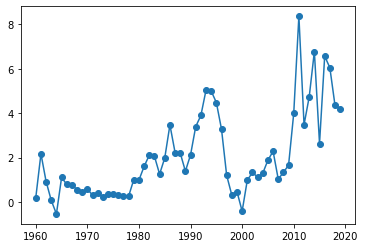

In [20]:
mexico_df['ODAReceived_PerCapita_USD'].plot(marker='o', include_bool=True)
_, _, series_info = get_series_info(sheet, 'DT.ODA.ODAT.PC.ZS')
print(series_info)

In [ ]:
cnt = 0
for col in mexico_df.columns:
    fig, ax = plt.subplots()
    mexico_df[col].plot(ax=ax, title=col, marker='o', include_bool=True)
    cnt +=1 
    if cnt > 19:
        break

In [22]:
mexico_df.corr()

Series_Name,TechCoopGrants,HIV_Pct,ODAReceived_USD,NetMigration,ODAReceived_PctCGE,ODAReceived_PctImports,IncomeShare_Low20_Pct,Grants,VulnerableEmployment_Pct,ODAReceived_PctGNI,...,TotalWaterUsage_Amt,RailCargo,PerMill_InternetSubscript,NuclearElectric_Pct,EnergeInvestment_USD,SanitationPartnership_USD,ICT_Exports_USD,HydroElectric_Pct,TransportInvest_USD,ICT_Exports_Pct
Series_Name,,,,,,,,,,,,,,,,,,,,,
TechCoopGrants,1.000000,0.511993,0.569876,-0.344272,0.033614,-0.534055,0.179894,0.560201,-0.221599,-0.285734,...,0.610342,-0.083053,0.149784,0.861615,-0.038318,-0.195029,-0.228378,-0.889574,-0.210735,-0.201070
HIV_Pct,0.511993,1.000000,0.283985,0.602844,-0.482219,-0.615156,0.746385,0.583515,-0.816846,-0.418573,...,0.816380,0.737809,0.776667,0.000664,0.433065,0.204533,-0.849472,-0.838053,-0.125512,-0.809761
ODAReceived_USD,0.569876,0.283985,1.000000,0.229438,0.257870,0.047608,0.608663,0.834160,-0.365930,0.030543,...,0.646215,0.677349,-0.011011,0.325615,0.605162,0.349561,-0.588393,-0.491234,-0.066086,-0.628453
NetMigration,-0.344272,0.602844,0.229438,1.000000,-0.318385,-0.339227,0.814205,0.442236,-0.886196,0.270521,...,0.723576,0.985829,1.000000,-0.339397,0.433266,0.385611,-0.826233,0.145128,0.231204,-0.930225
ODAReceived_PctCGE,0.033614,-0.482219,0.257870,-0.318385,1.000000,0.846913,-0.289073,-0.187616,0.661907,0.824755,...,-0.470407,-0.241651,0.053441,0.012057,-0.157072,-0.199232,0.193614,-0.005008,-0.183356,0.088629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SanitationPartnership_USD,-0.195029,0.204533,0.349561,0.385611,-0.199232,-0.121267,0.385553,0.524629,-0.414018,0.018886,...,0.219696,0.570603,-0.287568,-0.466944,0.496641,1.000000,-0.350527,-0.349999,-0.096203,-0.359032
ICT_Exports_USD,-0.228378,-0.849472,-0.588393,-0.826233,0.193614,0.224682,-0.842237,-0.775537,0.882345,-0.145391,...,-0.955819,-0.887172,-0.921929,0.523538,-0.600295,-0.350527,1.000000,0.650209,-0.071136,0.966097
HydroElectric_Pct,-0.889574,-0.838053,-0.491234,0.145128,-0.005008,0.512947,-0.544328,-0.540957,0.726113,0.031713,...,-0.876115,-0.592991,-0.484459,-0.753863,-0.355057,-0.349999,0.650209,1.000000,-0.071855,0.595222


<AxesSubplot:xlabel='Series_Name', ylabel='Series_Name'>

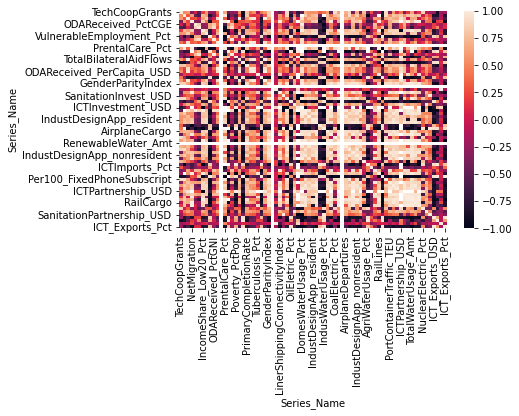

In [23]:
sns.heatmap(mexico_df.corr(method='pearson'))

In [74]:
# oda = mexico_df.corr()['ODAReceived_PerCapita_USD'].sort_values(ascending=False)
sample = mexico_df['ODAReceived_PerCapita_USD']
sample.T

1960    0.205444
1961    2.173687
1962    0.923739
1963    0.073802
1964   -0.531434
          ...   
2016    6.562214
2017    6.047653
2018    4.352933
2019    4.199786
2020         NaN
Name: ODAReceived_PerCapita_USD, Length: 61, dtype: float64

In [24]:
def get_corrs(df):
    col_correlations = df.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations.stack()
    return cor_pairs.to_dict()

my_corrs = get_corrs(mexico_df)

In [ ]:
for k,v in my_corrs.items():
    if 0.9 < v < 1.0 : 
        print(f'{k} : {round(v, 2)}')
        

### Draw a Scatter plot chart

In [19]:
def year_col(dataframe, sn1, sn2, year):
    df1 = dataframe.loc[dataframe['Series_Name']==f'{sn1}']
    df1 = df1[[f'{year}', 'Country_Name']]
    df1.set_index('Country_Name', inplace=True)

    df2 = dataframe.loc[dataframe['Series_Name']==f'{sn2}']
    df2 = df2[[f'{year}', 'Country_Name']]
    df2.set_index('Country_Name', inplace=True)

    if df1 is None or df2 is None:
        print('here')

    return df1, df2


In [20]:
def new_year_col(dataframe, sn1, sn2):
    df1 = dataframe.loc[dataframe['Series_Name']==f'{sn1}']
    df1.drop(columns=['Country_Code', 'Series_Name', 'Series_Code'], inplace=True)
    df1.set_index('Country_Name', inplace=True)

    df2 = dataframe.loc[dataframe['Series_Name']==f'{sn2}']
    df2.drop(columns=['Country_Code', 'Series_Name', 'Series_Code'], inplace=True)
    df2.set_index('Country_Name', inplace=True)

    if df1 is None or df2 is None:
        print('here')

    return df1, df2

In [21]:
def draw_scatter_plot(dataframe, sn1, sn2, year):
    df1, df2 = year_col(new_df,sn1, sn2, year)

    plt.figure(figsize=(6, 6), dpi=100)
    plt.suptitle(f'{sn1} & {sn2} : {year}', fontsize=10)    
    plt.xlabel(f'{sn1}')
    plt.ylabel(f'{sn2}')
    # size = [math.log(n) for n in df1[f'{year}']]
    plt.scatter(df1, df2, c = df1.values, alpha=0.5)

    Country_Name = dataframe.Country_Name.unique()
    for i, label in enumerate(Country_Name):
        plt.annotate(label, (df1[f'{year}'][i], df2[f'{year}'][i]), fontsize=13, va='baseline', ha='center')


In [44]:
def new_draw_scatter_plot(df, sn1, sn2, cn):
    df1, df2 = new_year_col(df, sn1, sn2)
    years = df1.columns.to_list()

    plt.figure(figsize=(6, 6), dpi=100)
    plt.suptitle(f'{sn1} & {sn2}', fontsize=10)    
    plt.xlabel(f'{sn1}')
    plt.ylabel(f'{sn2}')
    plt.scatter(df1.loc[cn], df2.loc[cn], c = df1.loc[cn].values, alpha=0.5)

    for n in cn:
        label = n 
        for y in years: 
            plt.annotate((n + y), (df1[f'{y}'][label], df2[f'{y}'][label]), fontsize=9, va='baseline', ha='center')
            

In [51]:
d1, d2 = new_year_col(new_df,'ICT_Exports_USD', 'TechCoopGrants')
d1


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country_Name,,,,,,,,,,,,,,,,,,,,,
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.800883e+09,1.754218e+09,1.730268e+09,1.443465e+09,1.473497e+09,1.634173e+09,2.227688e+09,2.240250e+09,2.054158e+09,1.942539e+09
Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.275532e+07,1.275532e+07,1.041493e+07,1.041493e+07,8.555419e+06,2.618762e+07,2.156741e+07,2.072271e+07,2.920624e+07,4.609680e+07
Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.295000e+07,9.084248e+07,1.004494e+08,8.875076e+07,8.019057e+07,6.887041e+07,7.163410e+07,8.552936e+07,4.385578e+07,4.943639e+07
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.234491e+08,7.316992e+08,7.078846e+08,1.446455e+09,1.571480e+09,1.803756e+09,2.186198e+09,2.617477e+09,2.573792e+09,2.551742e+09
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.398747e+08,3.961825e+08,3.526296e+08,3.426694e+08,3.168776e+08,3.444136e+08,3.465445e+08,3.982242e+08,4.126212e+08,4.443817e+08
Colombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.473309e+08,6.298715e+08,6.358053e+08,6.008562e+08,5.165921e+08,5.070971e+08,5.442354e+08,5.775988e+08,5.273384e+08,5.344287e+08
Costa Rica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.532466e+08,6.915969e+08,7.234174e+08,8.491296e+08,1.001667e+09,1.094730e+09,1.163436e+09,1.149880e+09,1.370635e+09,1.343570e+09
Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.538452e+07,1.543142e+07,1.558774e+07,1.131726e+07,1.144243e+07,1.194342e+07,1.167470e+07,1.144292e+07,1.154774e+07,1.089788e+07
Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.595486e+08,1.438525e+08,1.256959e+08,1.105434e+08,8.838200e+07,8.201064e+07,6.002956e+07,5.908541e+07,7.097680e+07,8.730657e+07


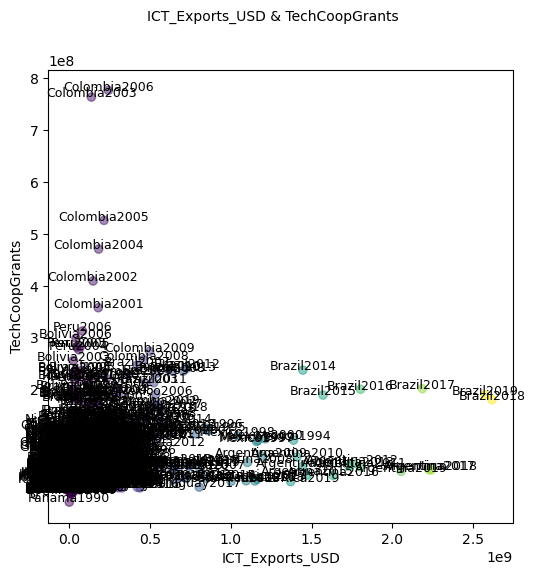

In [45]:
Country_Name = new_df.Country_Name.unique()
# for cn in Country_Name:
new_draw_scatter_plot(new_df,'ICT_Exports_USD', 'TechCoopGrants', Country_Name)

In [169]:
def dim_col(dataframe, sn):
    df = dataframe.loc[dataframe['Series_Name']==f'{sn}']
    df = df.drop(['Country_Code','Series_Code','Series_Name'], axis=1)
    return df

In [543]:
def draw_3d_plot(dataframe, sn):

    df = dataframe.loc[dataframe['Series_Name']==f'{sn}']
    df = df.drop(['Country_Code','Series_Code','Series_Name'], axis=1)

    n_df = pd.DataFrame(columns = ['Country_Name' , 'Year', 'Value' ])

    for c, v in  df.items():
        
        if c == 'Country_Name':
            cn = v 
            cn_tick = list(cn.values)
            continue

        for i, j in enumerate(v) :
            n_df = n_df.append({'Country_Name' : float(i) , 'Year' : float(c) , 'Value' : float(j) } , ignore_index=True)

    n_df = n_df.fillna(0)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(projection='3d')

    fontlabel = {"fontsize":"large", "color":"black", "fontweight":"bold"}
    ax.set_xlabel('Year', fontdict=fontlabel, loc = 'center', labelpad=10)
    ax.set_ylabel('Country', fontdict=fontlabel, loc = 'bottom', labelpad=40)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel('Value', fontdict=fontlabel)
    plt.yticks(range(0,len(cn_tick)), cn_tick, rotation = 45, ha = 'right')

    ax.plot_trisurf(n_df['Year'], n_df['Country_Name'], n_df['Value'], cmap=plt.cm.rainbow)

    # ax.stem(n_df['Year'], n_df['Country_Name'], n_df['Value'])

    # rotate the axes and update
    ax.view_init(25, 205)

    plt.show()

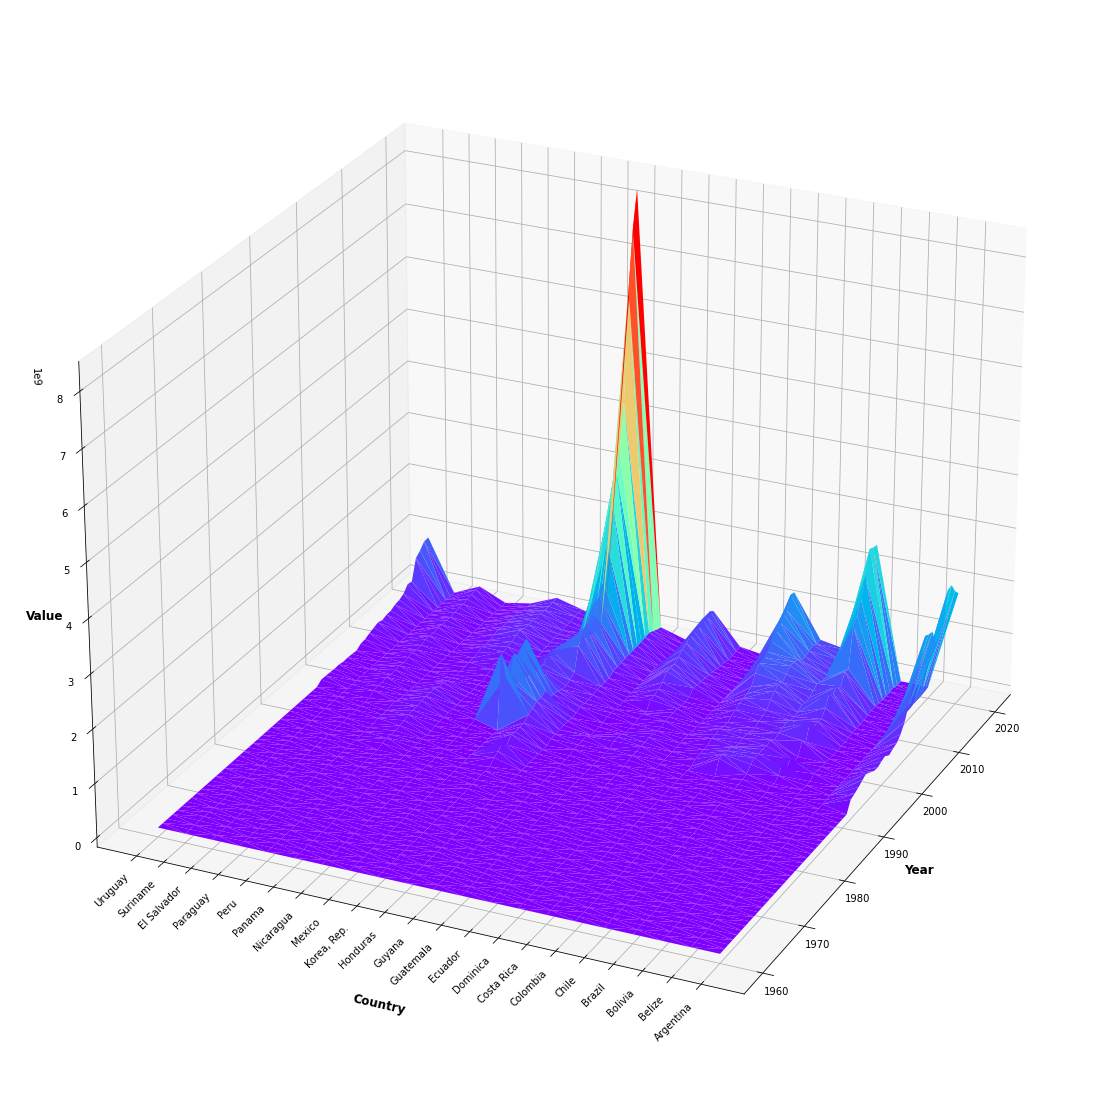

In [544]:
draw_3d_plot(new_df, 'ICT_Exports_USD')
